In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '../'))
from hardware.slm import SLM
from hardware.camera import NITCam
from hardware.waveshaper import Waveshaper
from hardware.yokogawa_osa import YokogawaOSA

from experiments.matrix_multiplier import MatrixMultiplier

slm1 = SLM(1)
slm2 = SLM(2)
camera = NITCam()
ws = Waveshaper()
osa = YokogawaOSA()

omvm = MatrixMultiplier(slm1, slm2, camera, ws, osa)

Observer initialized


In [2]:
slm1.grid_config.matrixsize_0 = 20
slm1.grid_config.matrixsize_1 = 30
slm1.grid_config.elem_width = 12
slm1.grid_config.elem_height = 10
slm1.grid_config.topleft_x = 810
slm1.grid_config.topleft_y = 338
slm1.grid_config.gap_x = 6
slm1.grid_config.gap_y = 10

slm2.grid_config.matrixsize_0 = 10
slm2.grid_config.matrixsize_1 = 10
slm2.grid_config.elem_width = 8
slm2.grid_config.elem_height = 6
slm2.grid_config.topleft_x = 920
slm2.grid_config.topleft_y = 585
slm2.grid_config.gap_x = 2
slm2.grid_config.gap_y = 1

camera.bitDepth = 14
camera.exposure_time = 10000
camera.analog_gain = "High"
# camera.FPS = "30"
camera.frame_width = 160
camera.frame_height = 296
camera.offset_x = 800
camera.offset_y = 460

In [3]:
matrix1 = np.ones((30,20))
matrix2 = np.ones((10,10))

matrix1_phase = slm1.get_phase_for_attenuation(matrix1)
matrix2_phase = slm2.get_phase_for_attenuation(matrix2)

generate_plot = False
matrix_mask1 = slm1.embed_matrix(matrix1_phase, plot=generate_plot)
matrix_mask2 = slm2.embed_matrix(matrix2_phase, plot=generate_plot)

In [4]:
camera.connect()

In [5]:
camera.bitDepth = 14
camera.exposure_time = 10000
camera.analog_gain = "High"
camera.FPS = 10
camera.frame_width = 120
camera.frame_height = 240
camera.offset_x = 676
camera.offset_y = 464

In [6]:
import time
time.sleep(3)
single_frame = camera.capture_single_frame(save_log=True)

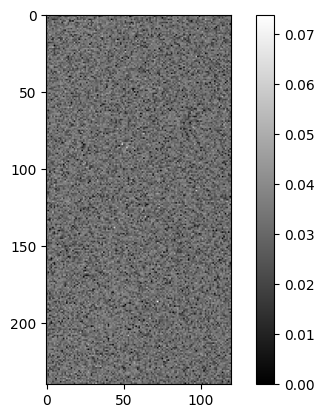

In [7]:
camera.plot_frame(single_frame)

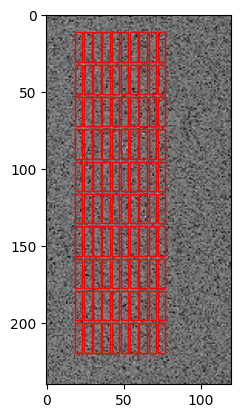

In [8]:
camera.grid_config.matrixsize_0 = 10
camera.grid_config.matrixsize_1 = 10
camera.grid_config.elem_width = 5
camera.grid_config.elem_height = 19
camera.grid_config.topleft_x = 18
camera.grid_config.topleft_y = 11
camera.grid_config.gap_x = 1
camera.grid_config.gap_y = 2

camera.grid_config.plot_rect_array(single_frame)

In [9]:
camera.clearFrames()

In [10]:
dark_data = omvm.capture_dark(10)


(240, 120)


In [12]:
omvm.logger.info("Dark data captured", ndarray=dark_data)